# HSE 2021: Mathematical Methods for Data Analysis

## Homework 4

**Warning 1**: You have 2 weeks for this assignemnt.  **it is better to start early (!)**

**Warning 2**: it is critical to describe and explain what you are doing and why, use markdown cells


### Contents

#### Decision Trees - 7 points
* [Task 1](#task1) (0.5 points)
* [Task 2](#task2) (0.5 points)
* [Task 3](#task3) (2 points)
* [Task 4](#task4) (0.5 points)
* [Task 5](#task5) (0.5 points)
* [Task 6](#task6) (2 points)
* [Task 7](#task7) (0.5 points)
* [Task 8](#task8) (0.5 points)

#### Ensembles - 3 points
* [Task 1](#task2_1) (1 point)
* [Task 2](#task2_2) (0.7 points)
* [Task 3](#task2_3) (0.5 points)
* [Task 4](#task2_4) (0.7 points)
* [Task 5](#task2_5) (0.1 points)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = (11, 5)
%matplotlib inline

# Part 1. Decision Tree Regressor

In this task you will be implementing decision tree for the regression by hand. 

### Task 1 <a id="task1"></a> (0.5 points)

Here you should implement the function `H()` which calculates impurity criterion. We will be training regression tree, and will take mean absolute deviation as impurity criterion.

* You cannot use loops
* If `y` is empty, the function should return 0

In [ ]:
def H(y):
    """
    Calculate impurity criterion
    
    Parameters
    ----------
    y : np.array
        array of objects target values in the node

    Returns
    -------
    H(R) : float
        Impurity in the node (measuread by variance)
    """
    if len(y) == 0:
      return 0
    else:
      series = pd.Series(y)
      result = series.mad()
      return result

In [ ]:
# Test the function
assert np.allclose(H(np.array([4, 2, 2, 2])), 0.75)
assert np.allclose(H(np.array([])), 0.0)

### Task 2 <a id="task2"></a>  (0.5 points)

To find the best split in the node we need to calculate the cost function. Denote: 
- `R` all the object in the node
- `j` index of the feature selected for the split
- `t` threshold
- `R_l` and `R_r` objects in the left and right child nodes correspondingly

We get the following cost function:

$$
Q(R, j, t) =\frac{|R_\ell|}{|R|}H(R_\ell) + \frac{|R_r|}{|R|}H(R_r) \to \min_{j, t},
$$

Implement the function `Q`, which should calculate value of the cost function for a given feature and threshold.

In [ ]:
def Q(X, y, j, t):
    """
    Calculate cost function
    Parameters
    ----------
    X : ndarray
        array of objects in the node 
    y : ndarray
        array of target values in the node 
    j : int
        feature index (column in X)
    t : float
        threshold

    Returns
    -------
    Q : float
        Value of the cost function
    """   
    is_left = X[:, j] <= t
    right = y[is_left]
    left = y[~is_left]
    Q = H(left) * left.size / X.shape[0]  + H(right) * right.size / X.shape[0]
    return Q

### Task 3 <a id="task3"></a>  (2 points)

Now, let's implement `MyDecisionTreeRegressor` class. More specifically, you need to implement the following methods:

- `best_split`
- `grow_tree`
- `get_prediction`

Also, please add `min_samples_leaf` parameter to your class

Read docstrings for more details. Do not forget to use function `Q` implemented above, when finding the `best_split`

In [ ]:
class Node(object):
    """
    Class for a decision tree node.
    
    Parameters
    ----------
    right : Node() or None
        Right child
    right : Node() or None
        Left child
    threshold: float
        
    column: int
        
    depth: int
        
    prediction: float
        prediction of the target value in the node 
        (average values calculated on a train dataset)
    is_terminal:bool
        indicates whether it is a terminal node (leaf) or not
    """    
    def __init__(self):        
        self.right = None
        self.left = None
        self.threshold = None
        self.column = None
        self.depth = None
        self.is_terminal = False
        self.prediction = None
        
    def __repr__(self):
        if self.is_terminal:
            node_desc = 'Pred: {:.2f}'.format(self.prediction)
        else:
            node_desc = 'Col {}, t {:.2f}, Pred: {:.2f}'. \
            format(self.column, self.threshold, self.prediction)
        return node_desc

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

class MyDecisionTreeRegressor(RegressorMixin, BaseEstimator):
    """
    Class for a Decision Tree Regressor.

    Parameters
    ----------
    max_depth : int
        Max depth of a decision tree.
    min_samples_split : int
        Minimal number of samples (objects) in a node to make a split.
    """ 
    def __init__(self, max_depth=3, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
            
    def best_split(self, X, y):
        """
        Find the best split in terms of Q of data in a given decision tree node. 
        Try all features and thresholds. 
        
        Parameters
        ----------
        X : ndarray, shape (n_objects, n_features)
            Objects in the parent node
        y : ndarray, shape (n_objects, )
            1D array with the object labels. 
            
        Returns
        -------
        best_split_column : int
            Index of the best split column
        best_threshold : float
            The best split condition.
        X_left : ndarray, shape (n_objects_l, n_features)
            Objects in the left child
        y_left : ndarray, shape (n_objects_l, )
            Objects labels in the left child. 
        X_right : ndarray, shape (n_objects_r, n_features)
            Objects in the right child
        y_right : ndarray, shape (n_objects_r, )
            Objects labels in the right child. 
        """
        
        # To store best split parameters
        best_split_column = None
        best_threshold = None
        # without splitting
        best_cost = H(y) 
        
        for index in range(X.shape[1]):
          column = X[:, index]
          for t in column:
            curr_cost = Q(X, y, index, t)
            if curr_cost < best_cost:
              best_split_column = index
              best_threshold = t
              best_cost = curr_cost
        
        # Попросил check_estimator().
        if best_split_column is None:
          return None, None, None, None, None, None

        is_left = X[:, best_split_column] <= best_threshold
        X_left = X[is_left, :]
        y_left = y[is_left]
        X_right = X[~is_left, :]
        y_right = y[~is_left]

        return best_split_column, best_threshold, X_left, y_left, X_right, y_right
    
    def is_terminal(self, node, y):
        """
        Check terminality conditions based on `max_depth`, 
        `min_samples_split` parameters for a given node. 
        
        Parameters
        ----------
        node : Node, 
            
        y : ndarray, shape (n_objects, )
            Object labels. 
            
        Returns
        -------
        Is_termial : bool
            If True, node is terminal
        """
        if node.depth >= self.max_depth:    
            return True
        if len(y) < self.min_samples_split:   
            return True
        return False
        
    def grow_tree(self, node, X, y):
        """
        Reccurently grow the tree from the `node` using a `X` and `y` as a dataset:
         - check terminality conditions
         - find best split if node is not terminal
         - add child nodes to the node
         - call the function recursively for the added child nodes
        
        Parameters
        ----------
        node : Node() object
            Current node of the decision tree.
        X : ndarray, shape (n_objects, n_features)
            Objects 
        y : ndarray, shape (n_objects)
            Labels
        """
        
        # Check terminality conditions
        if self.is_terminal(node, y):
            node.is_terminal = True
            return
        
        # Find best split if node is not terminal.
        best_split_column, best_threshold, X_left, y_left, X_right, y_right = self.best_split(X, y)

        if best_split_column == None:
          node.is_terminal = True
          return
        
        # min_samples_leaf check
        if len(X_left) < self.min_samples_leaf or len(X_right) < self.min_samples_leaf:
            node.is_terminal = True
            return
        
        # Устанаваливаем значения метрик для детишек.
        node.left = Node()
        node.left.depth = node.depth + 1
        node.right = Node()
        node.right.depth = node.depth + 1
        node.left.prediction = np.mean(y_left)
        node.right.prediction = np.mean(y_right)

        node.column = best_split_column
        node.threshold = best_threshold

        # Рекурсивный вызов функции для левого и правого ребенков.
        self.grow_tree(node.left, X_left, y_left)
        self.grow_tree(node.right, X_right, y_right)
        

    def fit(self, X, y):
        """
        Fit the Decision Tree Regressor.
            
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            The input samples.
        y : ndarray, shape (n_samples,) or (n_samples, n_outputs)
            The target values.
        Returns
        -------
        self : object
            Returns self.
        """
        X, y = check_X_y(X, y, accept_sparse=False)
        self.is_fitted_ = True
        # Попросил check_estimator().
        self.n_features_in_ = X.shape[1]
        
        # Initialize the tree (root node)
        self.tree_ = Node()
        # Авторское изменение.                             
        self.tree_.depth = 0                            
        self.tree_.prediction = np.mean(y)
        
        # Grow the tree
        self.grow_tree(self.tree_, X, y)
        return self        
    
    def get_prediction(self, node, x):
        """
        Get prediction for an object `x`
            - Return prediction of the `node` if it is terminal
            - Otherwise, recursively call the function to get 
            predictions of the proper child
        
        Parameters
        ----------
        node : Node() object
            Current node of the decision tree.
        x : ndarray, shape (n_features,)
            Array of feature values of one object.
        Returns
        -------
        y_pred : float
            Prediction for an object x
        """
         # Termination condition.
        if node.is_terminal == True:
            return node.prediction
        
        # Run to the current node's childs
        # Check split condition. If yes, go to the right child
        if x[node.column] > node.threshold:
            # Right child
            y_pred = self.get_prediction(node.right, x)
        else: 
            # Left child
            y_pred = self.get_prediction(node.left, x)

        return y_pred
    
    def predict(self, X):
        """ 
        Get prediction for each object in X
        
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            The input samples.
        Returns
        -------
        y : ndarray, shape (n_samples,)
            Returns predictions.
        """
        # Check input and that `fit` had been called
        X = check_array(X, accept_sparse=False)
        check_is_fitted(self, 'is_fitted_')
        
        # Get predictions
        y_predicted = []
        for x in X:
            y_curr = self.get_prediction(self.tree_, x)
            y_predicted.append(y_curr)
        return np.array(y_predicted)

    def _more_tags(self):
        return {'requires_y': False}

In [ ]:
# check yourself
from sklearn.utils.estimator_checks import check_estimator

check_estimator(MyDecisionTreeRegressor())

### Task 4 <a id="task4"></a>  (0.5 points)

Load boston dataset and split it on the train ($75\%$) and test ($25\%$). Fit Decision Tree of depth 1 and make the following plot:

- Scatter plot of the traning points (selected for split feature on the x-axis, target variable on the y-axis)
- Fitted model 

При загрузке датасета возникает $warning$, но на результат это не влияет!

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

dataset = load_boston()
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size = 0.25, random_state = 17)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

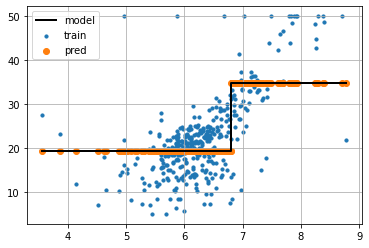

In [ ]:
tree = MyDecisionTreeRegressor(max_depth = 1)
tree.fit(X_train, y_train)

# Построение графика.
# Определяем основные параметры.
y_pred = tree.predict(X_train)
x_val = X_train[:, tree.tree_.column]
left = tree.tree_.left.prediction
right = tree.tree_.right.prediction

# Определяем значения для модели.
x_model = [min(x_val), tree.tree_.threshold, tree.tree_.threshold, max(x_val)]
y_model = [left, left, right, right]

# Непосредственно построение.
plt.scatter(x_val, y_train, label = "train", s = 10)
plt.scatter(x_val, y_pred, label = "pred")

plt.plot(x_model, y_model, label = "model", linewidth = 2, c = "black")

plt.grid()
plt.legend()
plt.show()

### Task 5 <a id="task5"></a>  (0.5 points)

Keep working with boston dataset. 
- Use `GridSearchCV` to find the best hyperparameters among [`max_depth`, `min_samples_leaf`] on 5-Fold cross-validation
- Train the model with the best set of hyperparameters on the whole train dataset. 
- Report `MAE` on test dataset and hyperparameters of the best estimator. 

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [1, 2, 5, 10], 'min_samples_leaf': [1, 2, 5, 10, 20, 50, 100]}
gscv = GridSearchCV(MyDecisionTreeRegressor(), params, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs=-1)
gscv.fit(X_train, y_train)
gscv.best_params_

{'max_depth': 5, 'min_samples_leaf': 2}

Как мы видим, $GridSearchCV$ выдал в качестве лучшего набора параметров $max\_depth=5$ и $min\_samples\_leaf=2$.

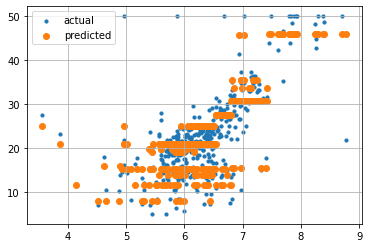

MAE =  2.780701343906459


In [ ]:
from sklearn.metrics import mean_absolute_error

tree = MyDecisionTreeRegressor(**gscv.best_params_)
tree.fit(X_train, y_train)

# Построение графика.
# Определяем основные параметры.
y_pred = y_pred = tree.predict(X_train)
x_val = X_train[:, tree.tree_.column]
threshold = tree.tree_.threshold
left = tree.tree_.left.prediction
right = tree.tree_.right.prediction

# Непосредственно построение.
plt.scatter(x_val, y_train, label = "actual", s = 10)
plt.scatter(x_val, y_pred, label = "predicted")
plt.grid()
plt.legend()
plt.show()

# Отчет по MAE.
mae = mean_absolute_error(y_test, tree.predict(X_test))
print("MAE = ", mae)

### Task 6 <a id="task6"></a>  (2 points)

Recall definition of bias and variance:
$$
\text{Bias}^2 = \mathbb{E}_{p(x, y)} \left[  (f(x) - \mathbb{E}_{\mathbb{X}}a_{\mathbb{X}}(x))^2 \right] \\
\text{Variance} = \mathbb{E}_{p(x, y)} \left[  \mathbb{V}_{\mathbb{X}}( a_{\mathbb{X}}(x))  \right]
$$

We wil now use use the following algorithm to estimate bias and variance:

1. Use bootsrap to create `n_iter` samples from the original dataset: $X_1, \dots, X_{n_iter}$
2. For each bootstrapped sample define out-of-bag (OOB) sample $Z_1, \dots, Z_{n_iter}$, which contain all the observations, which did not appear in the corresponding boostraped sample
3. Fit the model on $X_i$s and compute predictions on $Z_i$s
4. For a given *object* $n$:
     - bias^2: squared difference between true value $y_n$ and average prediction (average over the algorithms, for which $n$ was in OOB)
     - variance: variance of the prediction (predictions of the algorithms, for which $n$ was in OOB)
5. Average bias^2 and variance over all the points
    
**Implement `get_bias_variance` function, using the algorithm above**

*Note:*  You can only use 1 loop (for bootsrap iterations). All other operations should be vectorized. 

In [ ]:
def get_bias_variance(estimator, x, y, n_iter):
    """ 
    Calculate bias and variance of the `estimator`. 
    Using a given dataset and bootstrap with `n_iter` samples. 

    Parameters
    ----------
    x : ndarray, shape (n_samples, n_features)
        The input samples.
    y : ndarray, shape (n_samples, n_features)
        The input samples.
    n_iter: int
        Number of samples in 
    Returns
    -------
    bias2 : float, 
        Estiamted squared bias
    variance : float, 
        Estiamted variance
    """
    
    size = x.shape[0]
    prediction = np.full((size, n_iter), np.nan)
    
    for index in range(n_iter):
      generated = np.random.choice(size, size)
      invers = np.full(size, True)
      invers[generated] = False

      # Используем заданный эстиматор.
      estimator.fit(x[generated, :], y[generated])
      pred = estimator.predict(x[invers, :])
      prediction[invers, index] = pred

    # Вычисление требуемых параметров.
    bias2 = np.nanmean((np.nanmean(prediction, axis = 1) - y_train) ** 2)
    variance = np.nanmean(np.nanvar(prediction, axis = 1))

    return bias2, variance

Код ниже выдает $warnings$, которые не влияют на результат, поэтому можем их игнорировать. Эти же предупреждения будут возникать и в следующих номерах, но в этом нет ничего страшного. Триггером является функция $get\_bias\_variance()$.

In [ ]:
# Test
np.random.seed(8)

estimator = MyDecisionTreeRegressor(max_depth=8, min_samples_split=15)

get_bias_variance(estimator, X_train, y_train, 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Degrees of freedom <= 0 for slice.


(22.864950089437226, 9.178855753185896)

### Task 7 <a id="task7"></a>  (0.5 points)

Compute bias and variance for the trees with different min_samples_split. Plot how bias and variance change as min_samples_split increases. 

Comment on what you observe, how does your result correspond to theory?

In [ ]:
np.random.seed(8)

min_samples = np.arange(2, 21, 2)
bias_variance = np.array([get_bias_variance(MyDecisionTreeRegressor(min_samples_split = split), X_train, y_train, 10) for split in min_samples])
bias_variance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Degrees of freedom <= 0 for slice.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Degrees of freedom <= 0 for slice.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Degrees of freedom <= 0 for slice.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Degrees of freedom <= 0 for slice.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-p

array([[24.86298541,  7.55196738],
       [20.6602207 ,  7.45582475],
       [25.28964311,  8.24700572],
       [26.45049125,  6.03829791],
       [22.07130604,  9.09342021],
       [23.22227692,  6.11668989],
       [21.86673771, 10.18260017],
       [22.20976924,  5.74858381],
       [22.84417747,  4.70733239],
       [24.13373677,  6.91950278]])

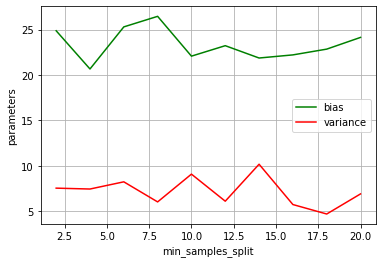

In [ ]:
plt.xlabel('min_samples_split')
plt.ylabel('parameters')

plt.plot(min_samples, bias_variance[:, 0], color = 'green', label = 'bias')
plt.plot(min_samples, bias_variance[:, 1], color = 'red', label = 'variance')

plt.legend()
plt.grid()
plt.show()

На графике видно, что обе величины ведут себя достаточно хаотично с увеличением $min\_samples\_split$. В теории величина $variance$ должна уменьшаться, на выбранном участке значений эта тенденция хоть и не особо, но видна при сравнении начальной и конечной точек на графике. Величина $bias$ должна увеличиваться, на графике дейсвительно присутствует момент пикового роста, однако после него случилось резкое падение, из-за чего конечная точка все-таки ниже начальной. Но можно предположить, что при более длительном росте $min\_samples\_split$ тенденция роста $bias$ была бы отчетлива.

### Task 8 <a id="task8"></a>  (0.5 points)

Let's try to reduce variance with bagging. Use `sklearn.ensemble.BaggingRegressor` to get an ensemble and compute its bias and variance. 

Answer the following questions:
 - How bagging should affect bias and variance in theory?
 - How bias and variance change (if they change) compared to an individual tree in you experiments? 
 - Do your results align with the theory? Why?

In [ ]:
from sklearn.ensemble import BaggingRegressor

bagging = BaggingRegressor(MyDecisionTreeRegressor(min_samples_split=10), random_state = 8)
get_bias_variance(bagging, X_train, y_train, 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Degrees of freedom <= 0 for slice.


(19.5128733431072, 2.1059227087443273)

Сравним с результатами для $min\_samples\_split=10,$ одним из варинатов прошлого задания, для которого $bias=22.07, variance=9.09$. Как мы видим, значение $variance$ уменьшилось более чем в 4 раза, что и должно было произойти в теории при применении $BaggingRegressor$. Значение $bias$ незначительно уменьшилось, в теории оно может совсем немного измениться, так что можно сказать, что результат соответствует. 